In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
def titanic_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if passenger_class == 1:
            return df[df['Pclass']==1]['Age'].mean()
        elif passenger_class == 2:
            return df[df['Pclass']==2]['Age'].mean()
        elif passenger_class == 3:
            return df[df['Pclass']==3]['Age'].mean()
    else:
        return age

In [6]:
df['Age']=df[['Age','Pclass']].apply(titanic_missing_age,axis=1)

In [7]:
df.drop('Cabin',axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
df.dropna(inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True,dtype='int32')
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [10]:
sex=pd.get_dummies(df['Sex'],drop_first=True,dtype='int32')
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
pclass=pd.get_dummies(df['Pclass'],drop_first=True,dtype='int32')
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [12]:
df=pd.concat([df,pclass,sex,embarked],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,0,0,1,0,0


In [13]:
df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.00000,1,0,7.2500,0,1,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,1,0,0,1
3,1,35.00000,1,0,53.1000,0,0,0,0,1
4,0,35.00000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,1,0,1
887,1,19.00000,0,0,30.0000,0,0,0,0,1
888,0,25.14062,1,2,23.4500,0,1,0,0,1
889,1,26.00000,0,0,30.0000,0,0,1,0,0


In [14]:
df.columns=df.columns.astype(str)

In [15]:
x=df.drop('Survived',axis=1)
x

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.00000,1,0,7.2500,0,1,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,1,0,0,1
3,35.00000,1,0,53.1000,0,0,0,0,1
4,35.00000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,1,0,1
887,19.00000,0,0,30.0000,0,0,0,0,1
888,25.14062,1,2,23.4500,0,1,0,0,1
889,26.00000,0,0,30.0000,0,0,1,0,0


In [16]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [17]:
import sklearn.model_selection as ms
xtrain,xtest,ytrain,ytest=ms.train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape

(711, 9)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble._weight_boosting import AdaBoostClassifier
from sklearn.ensemble._forest import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [20]:
n_estimators=100

In [22]:
models=[DecisionTreeClassifier(max_depth=3),
       BaggingClassifier(n_estimators=n_estimators),
        RandomForestClassifier(n_estimators=n_estimators),
       ExtraTreesClassifier(n_estimators=n_estimators),
       AdaBoostClassifier(n_estimators=n_estimators)]

In [23]:
model_title=['decision_tree','bagging','random_forest','extratree','adaboost']

In [24]:
surv_pred,surv_proba,scores,fprs,tprs,threshold=([] for i in range(6))

fittingdecision_tree


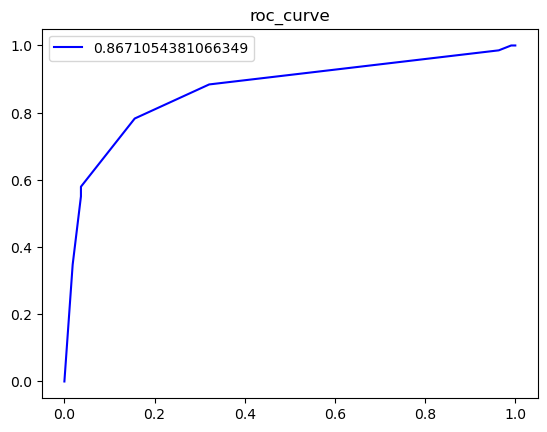

fittingbagging


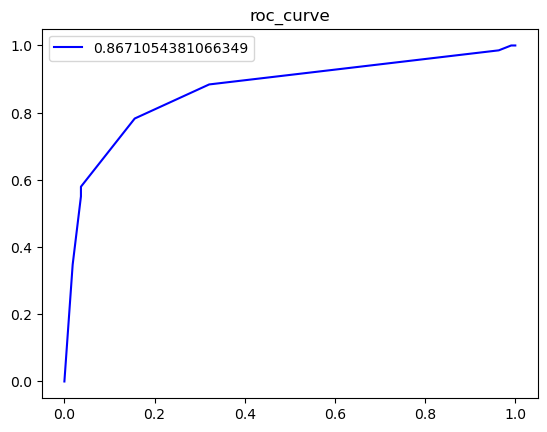

fittingrandom_forest


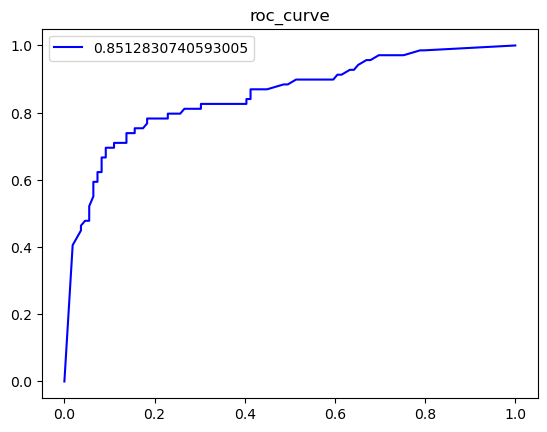

fittingextratree


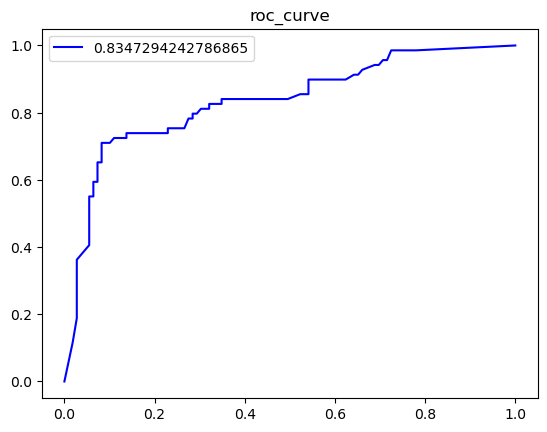

fittingadaboost


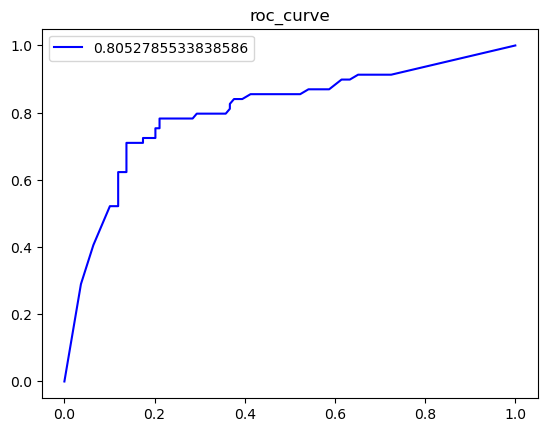

In [26]:
for i,model in enumerate(models):
    print('fitting{}'.format(model_title[i]))
    clf=model.fit(xtrain,ytrain)
    surv_pred.append(model.predict(xtest))
    surv_proba.append(model.predict_proba(xtest))
    scores.append(model.score(xtest,ytest))
    fpr,tpr,thres=roc_curve(ytest,surv_proba[i][:,1])
    fprs.append(fpr)
    tprs.append(tpr)
    threshold.append(thres)
    plt.title('roc_curve')
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,'b',label=roc_auc)
    plt.legend()
    plt.show()